## <center> Version 5

In [52]:
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from warnings import simplefilter #Filtering warnings
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from datetime import datetime
from scipy import stats

<font face = "Time New Roman" size = 6>Observe the data</font>

<font face = "Time New Roman" size = 5> Import the data set and show the title </font>

In [53]:
Orginal_data = pd.read_csv('./Combined.csv',encoding = "ISO-8859-1") #Combined data set
Causes_data = pd.read_csv('./Causes.csv',encoding = "ISO-8859-1")  #The data set with causes infomation
Orginal_data.columns #Show the columns of data set

Index(['Campaign_ID', 'Campagin_Title ', 'Receiving_NPO_name ',
       'Receiving_NPO_Id', 'NPO_Status_orignal', 'NPO_Status',
       'Number_campaigns_NPO', 'Public_Campaign_Access', 'Creator_Type',
       'Creator_Id', 'Campaign_Status', 'Actual_Donation_Amount',
       'Distinct_Donors', 'Campaign_Goal', 'Campaign_Completion_Rate',
       'Days_Left_for_Campaign', 'Campaign_Start_Date', 'Campaign_End_Date',
       'NPO_Tax_Deductibility', 'Campaign_Image1', 'Campaign_Image2',
       'Campaign_Image3', 'Campaign_Image4', 'Campaign_Image5',
       'Campaign_Video', 'Impact_Message1', 'Impact_Message2',
       'Impact_Message3', 'Impact_Message4', 'Impact_Message5',
       'Custom_Amount1', 'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Description_Campaign', 'Description_NPO'],
      dtype='object')

In [54]:
Causes_data= Causes_data.fillna(0)  #fill some missing causes data with 0
combined_data = pd.merge(Orginal_data, Causes_data, how='left', on=['Campaign_ID'])  #Merge two data set togather
Total_Rows = combined_data.shape[0]  #Get the rows number 
print(Total_Rows)  #Print out total rows number 

15979


In [55]:
print(combined_data.columns)

Index(['Campaign_ID', 'Campagin_Title ', 'Receiving_NPO_name ',
       'Receiving_NPO_Id', 'NPO_Status_orignal', 'NPO_Status',
       'Number_campaigns_NPO', 'Public_Campaign_Access', 'Creator_Type',
       'Creator_Id', 'Campaign_Status', 'Actual_Donation_Amount',
       'Distinct_Donors', 'Campaign_Goal', 'Campaign_Completion_Rate',
       'Days_Left_for_Campaign', 'Campaign_Start_Date', 'Campaign_End_Date',
       'NPO_Tax_Deductibility', 'Campaign_Image1', 'Campaign_Image2',
       'Campaign_Image3', 'Campaign_Image4', 'Campaign_Image5',
       'Campaign_Video', 'Impact_Message1', 'Impact_Message2',
       'Impact_Message3', 'Impact_Message4', 'Impact_Message5',
       'Custom_Amount1', 'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Description_Campaign', 'Description_NPO', 'Campaign_Title',
       'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_Heritage',
       'Org_Cause_Children_Youth', 'Org_Cause_Community',
       'Org_Cause_Disability', 'Org_Cause_Education', 'Org

<font face = "Time New Roman" size = 5>
All variables plan to operate, ignnore other columns temporarily
</font>

In [56]:
Need_variable = ["Actual_Donation_Amount","NPO_Tax_Deductibility", "Distinct_Donors",
"Campaign_Goal","Campaign_Start_Date", "Campaign_End_Date", 
"Campaign_Image1", "Campaign_Image2","Campaign_Image3",
"Campaign_Image4","Campaign_Image5","Campaign_Video",
"Impact_Message1","Impact_Message2","Impact_Message3","Impact_Message4",
"Impact_Message5","Custom_Amount1","Custom_Amount2","Custom_Amount3",
"Custom_Amount4","Description_Campaign","Description_NPO",
'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_Heritage',
'Org_Cause_Children_Youth', 'Org_Cause_Community',
'Org_Cause_Disability', 'Org_Cause_Education', 'Org_Cause_Elderly',
'Org_Cause_Environment', 'Org_Cause_Families', 'Org_Cause_Health',
'Org_Cause_Humanitarian', 'Org_Cause_Social Service',
'Org_Cause_Sports', 'Org_Cause_Women_Girls', 'Cam_Cause_Animal_Welfare',
'Cam_Cause_Arts_Heritage', 'Cam_Cause_Children_Youth',
'Cam_Cause_Community', 'Cam_Cause_Disability', 'Cam_Cause_Education',
'Cam_Cause_Elderly', 'Cam_Cause_Environment', 'Cam_Cause_Families',
'Cam_Cause_Health', 'Cam_Cause_Humanitarian',
'Cam_Cause_Social_Service', 'Cam_Cause_Sports', 'Cam_Cause_Women_Girls'
]
extract_data = combined_data[Need_variable]
extract_data

,Actual_Donation_Amount,NPO_Tax_Deductibility,Distinct_Donors,Campaign_Goal,Campaign_Start_Date,Campaign_End_Date,Campaign_Image1,Campaign_Image2,Campaign_Image3,Campaign_Image4,...,Cam_Cause_Disability,Cam_Cause_Education,Cam_Cause_Elderly,Cam_Cause_Environment,Cam_Cause_Families,Cam_Cause_Health,Cam_Cause_Humanitarian,Cam_Cause_Social_Service,Cam_Cause_Sports,Cam_Cause_Women_Girls
0,5561.0,True,66,50000,1-Jan-17,10-Sep-17,4608036,4608055,4749035,4749043,...,0,0,0,0,0,0,0,Social Service,0,0
1,2810.0,True,32,20000,1-Jan-17,31-Mar-17,4648562,4648570,0,0,...,Disability,0,0,0,0,0,0,0,0,0
2,1118.0,True,22,30000,1-Jan-17,28-Feb-17,4662653,4662666,0,0,...,Disability,0,0,0,0,0,0,0,0,0
3,2800.0,True,7,2000,2-Jan-17,31-Mar-17,4529083,4529099,4529209,4741001,...,0,0,Elderly,Environment,0,0,Humanitarian,Social Service,0,0
4,2030.0,True,27,5000,1-Jan-17,20-Feb-17,3417798,3417790,3417782,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,10.0,True,1,5000,31-Oct-22,1-Jan-23,81619865,81619875,81619884,81619892,...,0,Education,0,0,Families,0,0,0,0,0
15975,150.0,True,4,10000,31-Oct-22,30-Nov-22,81633173,81633175,81633177,0,...,0,0,0,0,0,Health,0,0,0,0
15976,1000.0,True,10,1000,31-Oct-22,30-Nov-22,81633197,81633199,81633301,0,...,0,0,0,0,0,Health,0,0,0,0
15977,120.0,True,2,3000,31-Oct-22,31-Dec-22,81635545,81635580,0,0,...,0,0,0,0,0,0,0,Social Service,0,Women & Girls


<font face = "Time New Roman" size = 5>"Actual_Donation_Amount" "Campaign_Video" "Impact_Message1" "Impact_Message2" "Impact_Message3" "Impact_Message4" and "Impact_Message5" are many missing data, fill them first so that it's more convenient to operate. </font>

In [57]:
extract_data['NPO_Tax_Deductibility'] = extract_data['NPO_Tax_Deductibility'].fillna('0')
extract_data['Campaign_Start_Date'] = extract_data['Campaign_Start_Date'].fillna('0')
extract_data['Campaign_End_Date'] = extract_data['Campaign_End_Date'].fillna('0')
extract_data['Actual_Donation_Amount'] = extract_data['Actual_Donation_Amount'].fillna('0')
extract_data['Actual_Donation_Amount'] = pd.to_numeric( extract_data['Actual_Donation_Amount'])
extract_data['Distinct_Donors'] = extract_data['Distinct_Donors'].fillna('0')
extract_data['Distinct_Donors'] = pd.to_numeric( extract_data['Distinct_Donors']) 
extract_data['Campaign_Video'] = extract_data['Campaign_Video'].fillna('0')
extract_data['Impact_Message1'] = extract_data['Impact_Message1'].fillna('0')
extract_data['Impact_Message2'] = extract_data['Impact_Message2'].fillna('0')
extract_data['Impact_Message3'] = extract_data['Impact_Message3'].fillna('0')
extract_data['Impact_Message4'] = extract_data['Impact_Message4'].fillna('0')
extract_data['Impact_Message5'] = extract_data['Impact_Message5'].fillna('0')

In [58]:
extract_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Actual_Donation_Amount    15979 non-null  float64
 1   NPO_Tax_Deductibility     15979 non-null  object 
 2   Distinct_Donors           15979 non-null  int64  
 3   Campaign_Goal             15979 non-null  int64  
 4   Campaign_Start_Date       15979 non-null  object 
 5   Campaign_End_Date         15979 non-null  object 
 6   Campaign_Image1           15979 non-null  int64  
 7   Campaign_Image2           15979 non-null  int64  
 8   Campaign_Image3           15979 non-null  int64  
 9   Campaign_Image4           15979 non-null  int64  
 10  Campaign_Image5           15979 non-null  int64  
 11  Campaign_Video            15979 non-null  object 
 12  Impact_Message1           15979 non-null  object 
 13  Impact_Message2           15979 non-null  object 
 14  Impact

<font face = "Time New Roman" size = 5>There is no donations per donor, So add a columns of donations per donor</font>

In [59]:
extract_data.columns

Index(['Actual_Donation_Amount', 'NPO_Tax_Deductibility', 'Distinct_Donors',
       'Campaign_Goal', 'Campaign_Start_Date', 'Campaign_End_Date',
       'Campaign_Image1', 'Campaign_Image2', 'Campaign_Image3',
       'Campaign_Image4', 'Campaign_Image5', 'Campaign_Video',
       'Impact_Message1', 'Impact_Message2', 'Impact_Message3',
       'Impact_Message4', 'Impact_Message5', 'Custom_Amount1',
       'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Description_Campaign', 'Description_NPO', 'Org_Cause_Animal_Welfare',
       'Org_Cause_Arts_Heritage', 'Org_Cause_Children_Youth',
       'Org_Cause_Community', 'Org_Cause_Disability', 'Org_Cause_Education',
       'Org_Cause_Elderly', 'Org_Cause_Environment', 'Org_Cause_Families',
       'Org_Cause_Health', 'Org_Cause_Humanitarian',
       'Org_Cause_Social Service', 'Org_Cause_Sports', 'Org_Cause_Women_Girls',
       'Cam_Cause_Animal_Welfare', 'Cam_Cause_Arts_Heritage',
       'Cam_Cause_Children_Youth', 'Cam_Cause_Communi

In [60]:
num_deductibility = 0
extract_data['Donation_per_donor'] = 0

for j in range(len(extract_data["Actual_Donation_Amount"])):
    if extract_data["Distinct_Donors"].iloc[j] != 0:
        extract_data['Donation_per_donor'].iloc[j] = extract_data['Actual_Donation_Amount'].iloc[j]/extract_data['Distinct_Donors'].iloc[j]
    else:
        extract_data['Donation_per_donor'].iloc[j] = 0

    if extract_data['NPO_Tax_Deductibility'].iloc[j] == True:
        extract_data.loc[j, 'NPO_Tax_Deductibility'] = 1
        num_deductibility += 1
    else:
        extract_data.loc[j, 'NPO_Tax_Deductibility'] = 0
print("Number of deductibility:", num_deductibility)

Number of deductibility: 14998


# <font size =6 face = 'time new roman' color = red> Here is the Number of deducbility: 14998/15979 = 93.86%</font>

# <font size =6 face = 'time new roman'> Calculate the numbers of "org_causes" and "camp_causes" </font>

In [61]:
Org_causes = ['Org_Cause_Animal_Welfare', 'Org_Cause_Arts_Heritage',
       'Org_Cause_Children_Youth', 'Org_Cause_Community',
       'Org_Cause_Disability', 'Org_Cause_Education', 'Org_Cause_Elderly',
       'Org_Cause_Environment', 'Org_Cause_Families', 'Org_Cause_Health',
       'Org_Cause_Humanitarian', 'Org_Cause_Social Service',
       'Org_Cause_Sports', 'Org_Cause_Women_Girls', 'Cam_Cause_Animal_Welfare',
       ]
Cam_causes = ['Cam_Cause_Arts_Heritage', 'Cam_Cause_Children_Youth',
       'Cam_Cause_Community', 'Cam_Cause_Disability', 'Cam_Cause_Education',
       'Cam_Cause_Elderly', 'Cam_Cause_Environment', 'Cam_Cause_Families',
       'Cam_Cause_Health', 'Cam_Cause_Humanitarian',
       'Cam_Cause_Social_Service', 'Cam_Cause_Sports',
       'Cam_Cause_Women_Girls']
Length_Org_causes = len(Org_causes)
Length_Cam_causes = len(Cam_causes)
extract_data['Org_causes'] = 0
extract_data['Cam_causes'] = 0

for j in range(Total_Rows):
    num_Org_causes = 0
    num_Cam_causes = 0
    for position1 in range(Length_Org_causes):
        num_Org_causes += 1 if extract_data[Org_causes[position1]].iloc[j] != 0 else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    for position2 in range(Length_Cam_causes):
        num_Cam_causes += 1 if extract_data[Cam_causes[position2]].iloc[j] != 0 else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    extract_data['Cam_causes'].iloc[j] = num_Cam_causes


<font face = "Time New Roman" size = 5>Add a columns of numbers of images</font>

In [62]:
Add_Campaign_Image_num = lambda x0,x1,x2,x3,x4: (x0 != 0).astype(np.int) +(x1 != 0).astype(np.int) + (x2 != 0).astype(np.int) + (x3 != 0).astype(np.int) + (x4 != 0).astype(np.int)
extract_data["Campaign_Image_num"] = Add_Campaign_Image_num(extract_data["Campaign_Image1"],extract_data["Campaign_Image2"],extract_data["Campaign_Image3"],extract_data["Campaign_Image4"],extract_data["Campaign_Image5"])

<font face = "Time New Roman" size = 5>Classfy video into “0” and ”1“ two categories</font>

In [63]:
Video_or_not = lambda x0: (x0 != '0').astype(np.int)
extract_data["Campaign_Video"] = Video_or_not(extract_data["Campaign_Video"])

<font face = "Time New Roman" size = 5> The format of the date needs to be modified and the duration will be calculated below </font>

In [64]:
month_dictionary = {'Jan':'1',
 'Feb':'2',
 'Mar':'3',
 'Apr':'4',
 'May':'5',
 'Jun':'6',
 'Jul':'7',
 'Aug':'8',
 'Sep':'9',
 'Oct':'10',
 'Nov':'11',
 'Dec':'12'}
extract_data['Campaign_Start_Day'] = '0'
extract_data['Campaign_Start_Month'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_End_Day'] = '0'
extract_data['Campaign_End_Month'] = '0'
extract_data['Campaign_End_Year'] = '0'
extract_data['Campaign_Start'] = '0'
extract_data['Campaign_End'] = '0'
extract_data['duration_day'] = '0'
i = 0

# Get the detail infomation of data
for row in extract_data['Campaign_Start_Date']:
    extract_data.loc[i, 'Campaign_Start_Day'] = extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_Start_Month'] = month_dictionary[ extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[1] ] 
    extract_data.loc[i, 'Campaign_Start_Year'] = '20'+ extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_End_Day'] = extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_End_Month'] = month_dictionary[extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[1]]
    extract_data.loc[i, 'Campaign_End_Year'] = '20' + extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_Start'] = extract_data.loc[i, 'Campaign_Start_Year'] + '-' + extract_data['Campaign_Start_Month'].iloc[i] + '-' + extract_data['Campaign_Start_Day'].iloc[i]
    extract_data.loc[i, 'Campaign_End'] = extract_data['Campaign_End_Year'].iloc[i] + '-' + extract_data['Campaign_End_Month'].iloc[i] + '-' + extract_data['Campaign_End_Day'].iloc[i]
    extract_data.loc[i, 'duration_day'] = (datetime.strptime(extract_data.loc[i, 'Campaign_End'], '%Y-%m-%d') - datetime.strptime(extract_data.loc[i,'Campaign_Start'], '%Y-%m-%d')).days
#    if extract_data.loc[i, 'duration_day'] < 0:
#        extract_data.loc[i, 'duration_day'] = 0
    i += 1

# <font size =6 face = 'time new roman' >Here delete the rows where duration_day less than 1</font>

In [65]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'duration_day'] <= 1:
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where duraiton less than 0:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where duraiton less than 0: 180


# <font size =6 face = 'time new roman' >Here delete the rows where Actual_Donation_Amount is 0 but Distinct_Donors bigger than 0</font>

In [66]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Actual_Donation_Amount'] <= 0 and extract_data.loc[index,'Distinct_Donors'] > 0 :
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where Actual_Donation_Amount less than 0 but Distinct_Donors bigger than 0: 100


In [67]:
extract_data['Avg_Custom_Amount'] = (extract_data['Custom_Amount1']+extract_data['Custom_Amount2'] +extract_data['Custom_Amount3'] + extract_data['Custom_Amount4'] )/4


In [68]:
extract_data[0:10]

,Actual_Donation_Amount,NPO_Tax_Deductibility,Distinct_Donors,Campaign_Goal,Campaign_Start_Date,Campaign_End_Date,Campaign_Image1,Campaign_Image2,Campaign_Image3,Campaign_Image4,...,Campaign_Start_Day,Campaign_Start_Month,Campaign_Start_Year,Campaign_End_Day,Campaign_End_Month,Campaign_End_Year,Campaign_Start,Campaign_End,duration_day,Avg_Custom_Amount
0,5561.0,1,66,50000,1-Jan-17,10-Sep-17,4608036,4608055,4749035,4749043,...,1,1,2017,10,9,2017,2017-1-1,2017-9-10,252,90.0
1,2810.0,1,32,20000,1-Jan-17,31-Mar-17,4648562,4648570,0,0,...,1,1,2017,31,3,2017,2017-1-1,2017-3-31,89,90.0
2,1118.0,1,22,30000,1-Jan-17,28-Feb-17,4662653,4662666,0,0,...,1,1,2017,28,2,2017,2017-1-1,2017-2-28,58,90.0
3,2800.0,1,7,2000,2-Jan-17,31-Mar-17,4529083,4529099,4529209,4741001,...,2,1,2017,31,3,2017,2017-1-2,2017-3-31,88,0.0
4,2030.0,1,27,5000,1-Jan-17,20-Feb-17,3417798,3417790,3417782,0,...,1,1,2017,20,2,2017,2017-1-1,2017-2-20,50,0.0
5,0.0,1,0,10000,1-Jan-17,1-Jan-18,3457900,0,0,0,...,1,1,2017,1,1,2018,2017-1-1,2018-1-1,365,90.0
6,1050.0,1,20,1000,3-Jan-17,7-Feb-17,4733693,4733902,4733910,4733918,...,3,1,2017,7,2,2017,2017-1-3,2017-2-7,35,0.0
7,4060.0,0,69,5000,3-Jan-17,31-Dec-17,4755544,3729434,4755552,4755560,...,3,1,2017,31,12,2017,2017-1-3,2017-12-31,362,90.0
8,550.0,1,6,500,3-Jan-17,14-Feb-17,4734966,4734974,4734982,4734998,...,3,1,2017,14,2,2017,2017-1-3,2017-2-14,42,0.0
9,38844.0,1,51,2000000,3-Jan-17,3-Jan-18,4735642,4735650,4735658,4735666,...,3,1,2017,3,1,2018,2017-1-3,2018-1-3,365,90.0


# <font size =6 face = 'time new roman' >Divide 5 messages into 4 category (old version)</font>

In [69]:
#extract_data['Msg1_category'] = 0
#extract_data['Msg2_category'] = 0
#extract_data['Msg3_category'] = 0
#extract_data['Msg4_category'] = 0
#extract_data['Msg5_category'] = 0
#
extract_data['Msg_category'] = 0

Impact_msg_list = ['Impact_Message1','Impact_Message2','Impact_Message3','Impact_Message4','Impact_Message5']
#Msg_category_list = ['Msg1_category','Msg2_category','Msg3_category','Msg4_category','Msg5_category']
def sentence_length(s):
    return len([i for i in s.split(' ') if i])

#for j in range(len(Impact_msg_list)):
#    cnt=0
#    for s in extract_data[Impact_msg_list[j]]:
#        extract_data[Msg_category_list[j]].iloc[cnt] = 0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
#        cnt += 1
cnt=0

for index,row in extract_data.iterrows():
    last_category = 0
    current_category = 0
    final_category = 0
    for index_col in Impact_msg_list:
        s = extract_data.loc[index, index_col]
        if(sentence_length(s)<=2): # Write nothing
            current_category = 0
        else:
            if(sentence_length(s)<=10): # Write very little
                current_category = 1
            else:
                if(sentence_length(s)<20): # Write very little
                    current_category = 2
                else:
                    current_category = 3
        if(current_category == last_category):
            last_category = current_category
        else:
            last_category = current_category if current_category>last_category else last_category # if different choose higher one
    #Msg_length = sentence_length(s)
    extract_data.loc[index,'Msg_category'] =  last_category #0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
    cnt += 1
 


# <font size =6 face = 'time new roman' >Divide 5 messages into 4 category (new version)</font>

In [70]:
import distance
extract_data['Total_distance'] = 0
def edit_distance(s1, s2):
    return distance.levenshtein(s1, s2)
for j in range(len(Impact_msg_list)-2):
    for i in range(extract_data[Impact_msg_list[j]].shape[0]):
        str1 = extract_data[Impact_msg_list[j]].iloc[i]
        str2 = extract_data[Impact_msg_list[j+1]].iloc[i]
        extract_data['Total_distance'].iloc[i] += edit_distance(str1, str2)



In [71]:
# besed on length and distance to divide into three new category
extract_data['new_msg_category'] = 0
for index,row in extract_data.iterrows():
    if extract_data.loc[index,'Msg_category'] == 2 or extract_data.loc[index,'Msg_category'] == 3:
        if extract_data.loc[index,'Total_distance'] >200:
            extract_data.loc[index,'new_msg_category'] = 2
        else:
            extract_data.loc[index,'new_msg_category'] = 1

extract_data.iloc[0:30,28:]

,Org_Cause_Education,Org_Cause_Elderly,Org_Cause_Environment,Org_Cause_Families,Org_Cause_Health,Org_Cause_Humanitarian,Org_Cause_Social Service,Org_Cause_Sports,Org_Cause_Women_Girls,Cam_Cause_Animal_Welfare,...,Campaign_End_Day,Campaign_End_Month,Campaign_End_Year,Campaign_Start,Campaign_End,duration_day,Avg_Custom_Amount,Msg_category,Total_distance,new_msg_category
0,0,0,0,Families,Health,0,Social Service,0,0,0,...,10,9,2017,2017-1-1,2017-9-10,252,90.0,3,347,2
1,0,0,0,0,0,0,Social Service,0,0,0,...,31,3,2017,2017-1-1,2017-3-31,89,90.0,2,218,2
2,0,0,0,0,0,0,Social Service,0,0,0,...,28,2,2017,2017-1-1,2017-2-28,58,90.0,2,218,2
3,0,Elderly,Environment,0,0,Humanitarian,Social Service,0,0,0,...,31,3,2017,2017-1-2,2017-3-31,88,0.0,0,0,0
4,0,0,0,0,Health,0,Social Service,0,0,0,...,20,2,2017,2017-1-1,2017-2-20,50,0.0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,1,2018,2017-1-1,2018-1-1,365,90.0,3,0,1
6,Education,0,0,Families,Health,0,0,0,0,0,...,7,2,2017,2017-1-3,2017-2-7,35,0.0,0,0,0
7,Education,0,Environment,0,0,0,0,0,0,Animal Welfare,...,31,12,2017,2017-1-3,2017-12-31,362,90.0,1,4,0
8,0,Elderly,0,Families,0,0,0,0,0,0,...,14,2,2017,2017-1-3,2017-2-14,42,0.0,0,0,0
9,Education,Elderly,0,0,Health,0,0,0,0,0,...,3,1,2018,2017-1-3,2018-1-3,365,90.0,2,4,1


Polarity and subjectivity

In [72]:
extract_data['Msg1_polarity'] = 0
extract_data['Msg1_subjectivity'] = 0
extract_data['Msg2_polarity'] = 0
extract_data['Msg2_subjectivity'] = 0
extract_data['Msg3_polarity'] = 0
extract_data['Msg3_subjectivity'] = 0
extract_data['Msg4_polarity'] = 0
extract_data['Msg4_subjectivity'] = 0
extract_data['Msg5_polarity'] = 0
extract_data['Msg5_subjectivity'] = 0
extract_data['Description_Campaign_polarity'] = 0
extract_data['Description_Campaign_subjectivity'] = 0

from textblob import TextBlob
# polarity项为文本积极性，是在[-1.0，1.0]范围内的浮点数
# subjectivity项为主观评分，是在[0.0，1.0]范围内的浮点数，其中0.0是非常客观的，而1.0是非常主观的
Impact_msg_list = ['Impact_Message1','Impact_Message2','Impact_Message3','Impact_Message4','Impact_Message5','Description_Campaign']
Msg_polarity_list = ['Msg1_polarity','Msg2_polarity','Msg3_polarity','Msg4_polarity','Msg5_polarity','Description_Campaign_polarity']
Msg1_subjectivity_list = ['Msg1_subjectivity','Msg2_subjectivity','Msg3_subjectivity','Msg4_subjectivity','Msg5_subjectivity','Description_Campaign_subjectivity']
for j in range(len(Impact_msg_list)):
    t=0
    for i in extract_data[Impact_msg_list[j]]:
        blob = TextBlob(str(i))
        sentiment = blob.sentiment
        extract_data[Msg_polarity_list[j]].iloc[t] = sentiment.polarity
        extract_data[Msg1_subjectivity_list[j]].iloc[t] = sentiment.subjectivity
        t+=1
# sum the total five messages polarity and subjectivity 
extract_data["Total_Msg_polarity"] = extract_data["Msg1_polarity"]+extract_data["Msg2_polarity"]+extract_data["Msg3_polarity"]+extract_data["Msg4_polarity"]+extract_data["Msg5_polarity"]
extract_data["Total_Msg_subjectivity"] = extract_data["Msg1_subjectivity"]+extract_data["Msg2_subjectivity"]+extract_data["Msg3_subjectivity"]+extract_data["Msg4_subjectivity"]+extract_data["Msg5_subjectivity"]
extract_data.iloc[0:30,28:]


,Org_Cause_Education,Org_Cause_Elderly,Org_Cause_Environment,Org_Cause_Families,Org_Cause_Health,Org_Cause_Humanitarian,Org_Cause_Social Service,Org_Cause_Sports,Org_Cause_Women_Girls,Cam_Cause_Animal_Welfare,...,Msg3_polarity,Msg3_subjectivity,Msg4_polarity,Msg4_subjectivity,Msg5_polarity,Msg5_subjectivity,Description_Campaign_polarity,Description_Campaign_subjectivity,Total_Msg_polarity,Total_Msg_subjectivity
0,0,0,0,Families,Health,0,Social Service,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405556,0.666667,0.350000,0.550000
1,0,0,0,0,0,0,Social Service,0,0,0,...,0.200000,0.241667,0.000000,0.000000,0.000000,0.000000,0.328247,0.420563,0.200000,0.241667
2,0,0,0,0,0,0,Social Service,0,0,0,...,0.200000,0.241667,0.000000,0.000000,0.000000,0.000000,0.421733,0.557711,0.200000,0.241667
3,0,Elderly,Environment,0,0,Humanitarian,Social Service,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.307500,0.490000,0.000000,0.000000
4,0,0,0,0,Health,0,Social Service,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.125000,0.200000,0.000000,0.000000
5,0,0,0,0,0,0,0,0,0,0,...,-0.200000,0.300000,-0.200000,0.300000,-0.200000,0.300000,0.166667,0.333333,-1.000000,1.500000
6,Education,0,0,Families,Health,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.266544,0.640122,0.000000,0.000000
7,Education,0,Environment,0,0,0,0,0,0,Animal Welfare,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162245,0.483673,0.000000,0.000000
8,0,Elderly,0,Families,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197917,0.341667,0.000000,0.000000
9,Education,Elderly,0,0,Health,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.625000,0.000000,0.000000


In [73]:
from textblob import TextBlob
blob = TextBlob(str("So sad, unhappy. Catastrophe, fear"))
sentiment = blob.sentiment
print(sentiment.polarity)

-0.55


In [74]:
# Nunber of description words
extract_data['Num_desc_cam'] = 0
extract_data['Num_desc_NPO'] = 0
for index, row in extract_data.iterrows():
    extract_data.loc[index, 'Num_desc_cam'] = sentence_length( str(extract_data.loc[index, 'Description_Campaign']))
    extract_data.loc[index, 'Num_desc_NPO'] = sentence_length( str(extract_data.loc[index, 'Description_NPO']))
extract_data


,Actual_Donation_Amount,NPO_Tax_Deductibility,Distinct_Donors,Campaign_Goal,Campaign_Start_Date,Campaign_End_Date,Campaign_Image1,Campaign_Image2,Campaign_Image3,Campaign_Image4,...,Msg4_polarity,Msg4_subjectivity,Msg5_polarity,Msg5_subjectivity,Description_Campaign_polarity,Description_Campaign_subjectivity,Total_Msg_polarity,Total_Msg_subjectivity,Num_desc_cam,Num_desc_NPO
0,5561.0,1,66,50000,1-Jan-17,10-Sep-17,4608036,4608055,4749035,4749043,...,0.0000,0.0,0.000,0.00,4.055556e-01,0.666667,0.350000,0.550000,161,163
1,2810.0,1,32,20000,1-Jan-17,31-Mar-17,4648562,4648570,0,0,...,0.0000,0.0,0.000,0.00,3.282468e-01,0.420563,0.200000,0.241667,209,164
2,1118.0,1,22,30000,1-Jan-17,28-Feb-17,4662653,4662666,0,0,...,0.0000,0.0,0.000,0.00,4.217330e-01,0.557711,0.200000,0.241667,155,164
3,2800.0,1,7,2000,2-Jan-17,31-Mar-17,4529083,4529099,4529209,4741001,...,0.0000,0.0,0.000,0.00,3.075000e-01,0.490000,0.000000,0.000000,160,92
4,2030.0,1,27,5000,1-Jan-17,20-Feb-17,3417798,3417790,3417782,0,...,0.0000,0.0,0.000,0.00,-1.250000e-01,0.200000,0.000000,0.000000,65,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,10.0,1,1,5000,31-Oct-22,1-Jan-23,81619865,81619875,81619884,81619892,...,0.0000,0.0,0.000,0.00,1.545455e-01,0.300000,0.000000,0.000000,82,162
15975,150.0,1,4,10000,31-Oct-22,30-Nov-22,81633173,81633175,81633177,0,...,0.0000,0.0,0.000,0.00,1.009294e-17,0.356439,0.000000,0.000000,147,45
15976,1000.0,1,10,1000,31-Oct-22,30-Nov-22,81633197,81633199,81633301,0,...,0.0000,0.0,0.000,0.00,1.009294e-17,0.356439,0.000000,0.000000,147,45
15977,120.0,1,2,3000,31-Oct-22,31-Dec-22,81635545,81635580,0,0,...,0.0000,0.0,0.000,0.00,0.000000e+00,0.000000,0.000000,0.000000,30,40


<font face = "Time New Roman" size = 5>  Convert to numeric type</font>

In [75]:

extract_data['duration_day'] = pd.to_numeric( extract_data['duration_day'])
#extract_data['Total_Msg_polarity'] = pd.to_numeric( extract_data['Total_Msg_polarity'])
extract_data['NPO_Tax_Deductibility'] = pd.to_numeric(extract_data['NPO_Tax_Deductibility'])


In [76]:
# Output new csv file
extract_data.to_csv('Model_data.csv')

In [77]:
extract_data['Campaign_Video'].iloc[0:20]

0     1
1     1
2     1
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    1
17    0
18    0
19    0
Name: Campaign_Video, dtype: int64

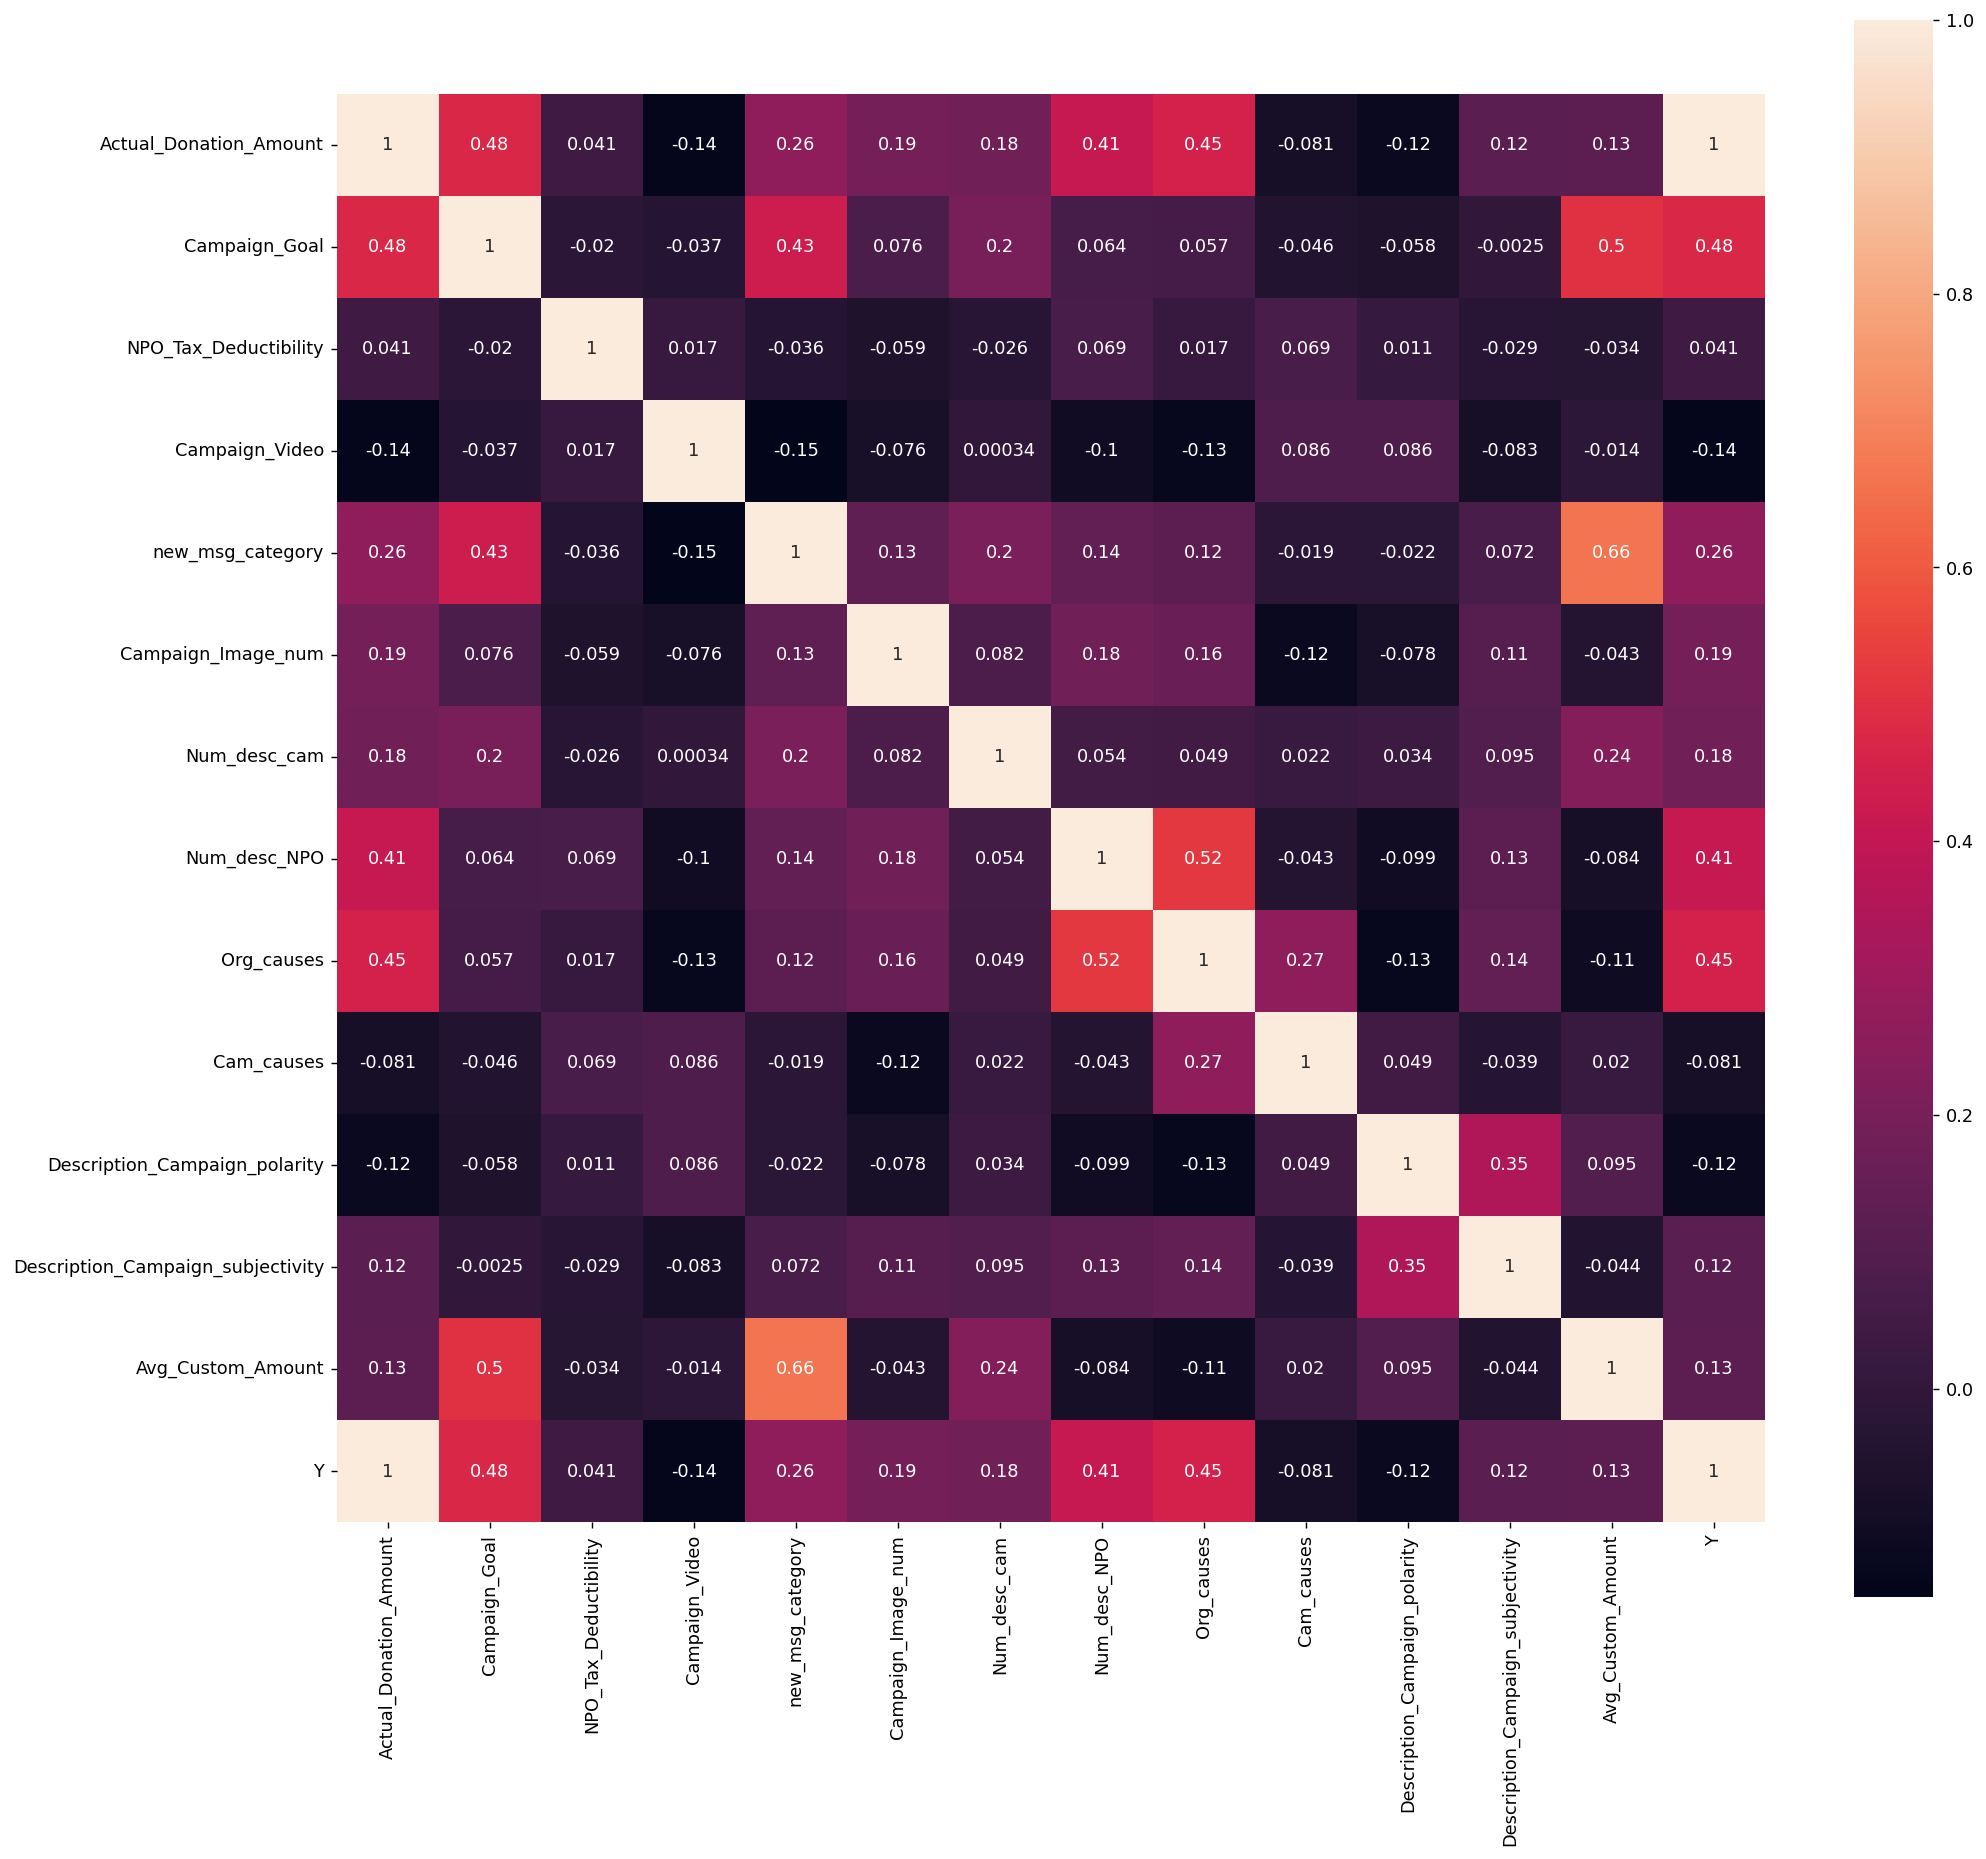

In [78]:
# Numeric_features Store the following variables that need to draw correlations
numeric_features1 = ['Actual_Donation_Amount', 'Campaign_Goal', 'NPO_Tax_Deductibility',
                     'Campaign_Video','new_msg_category',
                     'Campaign_Image_num','Num_desc_cam', 'Num_desc_NPO', 'Org_causes', 'Cam_causes',
                     'Description_Campaign_polarity','Description_Campaign_subjectivity', 'Avg_Custom_Amount']

# Correlation analysis
price_numeric = extract_data[numeric_features1]
correlation = extract_data.corr()
y_train = extract_data['Actual_Donation_Amount']
corr = plt.subplots(figsize = (18,16), dpi=128)
corr= sns.heatmap(price_numeric.assign(Y=y_train).corr(method='spearman'), annot=True,square=True)

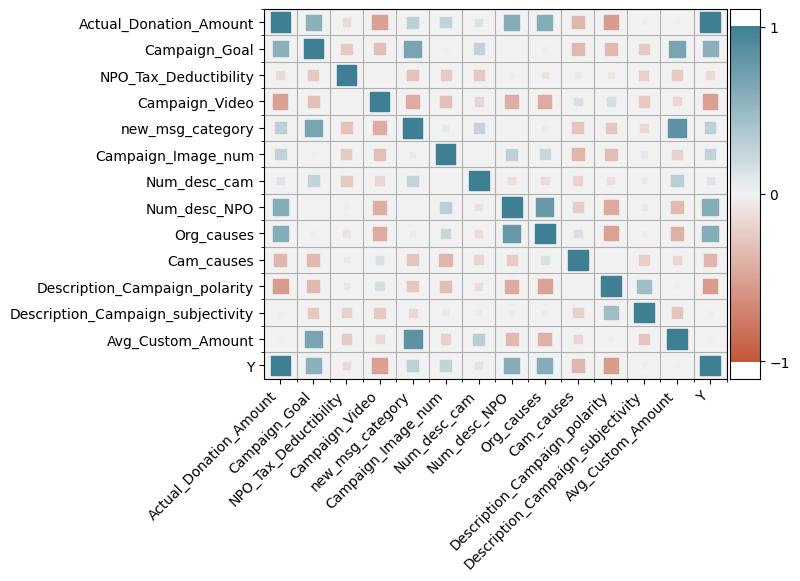

In [79]:
from heatmap import heatmap, corrplot
corrplot(price_numeric.assign(Y=y_train).corr(method='spearman').corr(), size_scale=200)

<font size =6 face = 'time new roman'> Variance inflation factor (Two methods to test make sure they are right)</font>

In [80]:

def vif(df, col_i):
	from statsmodels.formula.api import ols
	cols = list(df.columns)
	cols.remove(col_i)
	cols_noti = cols
	formula = col_i + '~' + '+'.join(cols_noti)
	r2 = ols(formula, df).fit().rsquared
	return 1.0 / (1.0 - r2)
	
test_data = extract_data[numeric_features1]
for i in numeric_features1:
	print(i, "\t", vif(df=test_data, col_i=i))


Actual_Donation_Amount 	 1.459969182194491
Campaign_Goal 	 1.5110379962393234
NPO_Tax_Deductibility 	 1.0212713675823801
Campaign_Video 	 1.0624091663965844
new_msg_category 	 1.1256819811463774
Campaign_Image_num 	 1.0814295282969473
Num_desc_cam 	 1.0685914660096896
Num_desc_NPO 	 2.3073613574766854
Org_causes 	 2.4433904113350438
Cam_causes 	 1.1560581036309596
Description_Campaign_polarity 	 1.2058259870121564
Description_Campaign_subjectivity 	 1.2280946618403097
Avg_Custom_Amount 	 1.0225878932510457


In [81]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np

#x = test_data
x = add_constant(test_data)

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(vif)


[45.65857147375825, 1.4599691821944905, 1.5110379962393234, 1.0212713675823801, 1.0624091663965844, 1.1256819811463774, 1.0814295282969473, 1.0685914660096896, 2.3073613574766854, 2.4433904113350438, 1.1560581036309596, 1.2058259870121564, 1.2280946618403097, 1.0225878932510457]


In [82]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
print(tol)


[0.021901692666288053, 0.6849459647476206, 0.6617967268121672, 0.9791716792837, 0.9412569390677792, 0.8883503660435386, 0.9247019559146089, 0.9358113290331409, 0.4333954873429939, 0.4092673832887844, 0.8650084254927926, 0.829307056549544, 0.8142694786259326, 0.9779110496025594]


# <font size =6 face = 'time new roman' color = red> Based on the result only the "Custom_Amount1-4" 's multi collinearity is high. Other variables seem reasonable.</font>

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant 
X = test_data  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds) 

Actual_Donation_Amount                1.495102
Campaign_Goal                         1.636296
NPO_Tax_Deductibility                11.728157
Campaign_Video                        1.752935
new_msg_category                      1.673364
Campaign_Image_num                    4.279239
Num_desc_cam                          5.282085
Num_desc_NPO                          9.667307
Org_causes                           12.026838
Cam_causes                           11.917094
Description_Campaign_polarity         2.593290
Description_Campaign_subjectivity    10.602541
Avg_Custom_Amount                     1.022778
dtype: float64


In [84]:
'''
Clean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]
for item in Clean_variables:
     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)
     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5 * iqr
     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5 * iqr

     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5 * iqr> extract_data[item]].index)
     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5 * iqr< extract_data[item]].index)

     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')

'''

"\nClean_variables = ['Actual_Donation_Amount','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]\nfor item in Clean_variables:\n     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)\n     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5 * iqr\n     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5 * iqr\n\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5 * iqr> extract_data[item]].index)\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5 * iqr< extract_data[item]].index)\n\n     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')\n\n"

In [85]:
extract_data

,Actual_Donation_Amount,NPO_Tax_Deductibility,Distinct_Donors,Campaign_Goal,Campaign_Start_Date,Campaign_End_Date,Campaign_Image1,Campaign_Image2,Campaign_Image3,Campaign_Image4,...,Msg4_polarity,Msg4_subjectivity,Msg5_polarity,Msg5_subjectivity,Description_Campaign_polarity,Description_Campaign_subjectivity,Total_Msg_polarity,Total_Msg_subjectivity,Num_desc_cam,Num_desc_NPO
0,5561.0,1,66,50000,1-Jan-17,10-Sep-17,4608036,4608055,4749035,4749043,...,0.0000,0.0,0.000,0.00,4.055556e-01,0.666667,0.350000,0.550000,161,163
1,2810.0,1,32,20000,1-Jan-17,31-Mar-17,4648562,4648570,0,0,...,0.0000,0.0,0.000,0.00,3.282468e-01,0.420563,0.200000,0.241667,209,164
2,1118.0,1,22,30000,1-Jan-17,28-Feb-17,4662653,4662666,0,0,...,0.0000,0.0,0.000,0.00,4.217330e-01,0.557711,0.200000,0.241667,155,164
3,2800.0,1,7,2000,2-Jan-17,31-Mar-17,4529083,4529099,4529209,4741001,...,0.0000,0.0,0.000,0.00,3.075000e-01,0.490000,0.000000,0.000000,160,92
4,2030.0,1,27,5000,1-Jan-17,20-Feb-17,3417798,3417790,3417782,0,...,0.0000,0.0,0.000,0.00,-1.250000e-01,0.200000,0.000000,0.000000,65,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,10.0,1,1,5000,31-Oct-22,1-Jan-23,81619865,81619875,81619884,81619892,...,0.0000,0.0,0.000,0.00,1.545455e-01,0.300000,0.000000,0.000000,82,162
15975,150.0,1,4,10000,31-Oct-22,30-Nov-22,81633173,81633175,81633177,0,...,0.0000,0.0,0.000,0.00,1.009294e-17,0.356439,0.000000,0.000000,147,45
15976,1000.0,1,10,1000,31-Oct-22,30-Nov-22,81633197,81633199,81633301,0,...,0.0000,0.0,0.000,0.00,1.009294e-17,0.356439,0.000000,0.000000,147,45
15977,120.0,1,2,3000,31-Oct-22,31-Dec-22,81635545,81635580,0,0,...,0.0000,0.0,0.000,0.00,0.000000e+00,0.000000,0.000000,0.000000,30,40


<font face = "Time New Roman" size = 6> Modeling verfication</font>

 <font face = "Time New Roman" size = 5> Variance, Average, Max, Min, Median calculation</font>

In [86]:
'''
i = 0
plt.figure(figsize=(13, 14))
plt.xticks([])
for title in numeric_features1:
    plt.subplot(4,3,i+1)
    plt.title(title)
    sns.kdeplot(extract_data[title], shade=True) 
    plt.xlabel(" ") 
    i += 1
'''
#plt.hist(extract_data['Campaign_Goal'], bins=80, histtype="stepfilled", alpha=.8)

'\ni = 0\nplt.figure(figsize=(13, 14))\nplt.xticks([])\nfor title in numeric_features1:\n    plt.subplot(4,3,i+1)\n    plt.title(title)\n    sns.kdeplot(extract_data[title], shade=True) \n    plt.xlabel(" ") \n    i += 1\n'

In [87]:
for title in numeric_features1:
    extract_data[title] = pd.to_numeric( extract_data[title])
    print( title, "Median:",np.mean(extract_data[title]))
    print( title, "Std:",np.std(extract_data[title]))
    #print( title, "Variance:" ,np.var(extract_data[title]))
    print( title, "Min:" ,np.min(extract_data[title]))
    print( title, "Max:" ,np.max(extract_data[title]))
    

Actual_Donation_Amount Median: 9984.546404229568
Actual_Donation_Amount Std: 63523.81739204215
Actual_Donation_Amount Min: 0.0
Actual_Donation_Amount Max: 3431670.0
Campaign_Goal Median: 45030.1663800242
Campaign_Goal Std: 154459.926444838
Campaign_Goal Min: 100
Campaign_Goal Max: 5000000
NPO_Tax_Deductibility Median: 0.9399324797757819
NPO_Tax_Deductibility Std: 0.23761189624749696
NPO_Tax_Deductibility Min: 0
NPO_Tax_Deductibility Max: 1
Campaign_Video Median: 0.4040384737881394
Campaign_Video Std: 0.4907049882435376
Campaign_Video Min: 0
Campaign_Video Max: 1
new_msg_category Median: 0.48079495509268105
new_msg_category Std: 0.6892918364587517
new_msg_category Min: 0
new_msg_category Max: 2
Campaign_Image_num Median: 2.8712019873877317
Campaign_Image_num Std: 1.5891370044097857
Campaign_Image_num Min: 0
Campaign_Image_num Max: 5
Num_desc_cam Median: 137.94904134021274
Num_desc_cam Std: 67.27662136258948
Num_desc_cam Min: 1
Num_desc_cam Max: 309
Num_desc_NPO Median: 101.2930122937766

<font face = "Time New Roman" size = 5> The Linear regression of selected variables</font> <font face = "Time New Roman" size = 5 color =red> Model 1</font>

In [88]:

import statsmodels.formula.api as smf

model2 = smf.ols(formula = 'Actual_Donation_Amount ~  Campaign_Goal  + NPO_Tax_Deductibility  +Campaign_Video+ new_msg_category+ \
    Campaign_Image_num  + Num_desc_cam  + Num_desc_NPO + Org_causes + Cam_causes + Description_Campaign_polarity+\
     Description_Campaign_subjectivity + Avg_Custom_Amount', data = extract_data).fit()

results2 = model2.summary()
print(results2)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.315
Model:                                OLS   Adj. R-squared:                  0.315
Method:                     Least Squares   F-statistic:                     601.3
Date:                    Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                            19:02:29   Log-Likelihood:            -1.9292e+05
No. Observations:                   15699   AIC:                         3.859e+05
Df Residuals:                       15686   BIC:                         3.860e+05
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [89]:
import statsmodels.formula.api as smf

X = extract_data[['Campaign_Goal', 'NPO_Tax_Deductibility', 'Campaign_Video','new_msg_category',
                     'Campaign_Image_num','Num_desc_cam', 'Num_desc_NPO', 'Org_causes', 'Cam_causes',
                     'Description_Campaign_polarity','Description_Campaign_subjectivity','Avg_Custom_Amount']] 
Y = extract_data['Actual_Donation_Amount']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
predicts = model1._results
print(results1)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.315
Model:                                OLS   Adj. R-squared:                  0.315
Method:                     Least Squares   F-statistic:                     601.3
Date:                    Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                            19:02:29   Log-Likelihood:            -1.9292e+05
No. Observations:                   15699   AIC:                         3.859e+05
Df Residuals:                       15686   BIC:                         3.860e+05
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [90]:
extract_data.to_csv("New Cleaned data.csv")

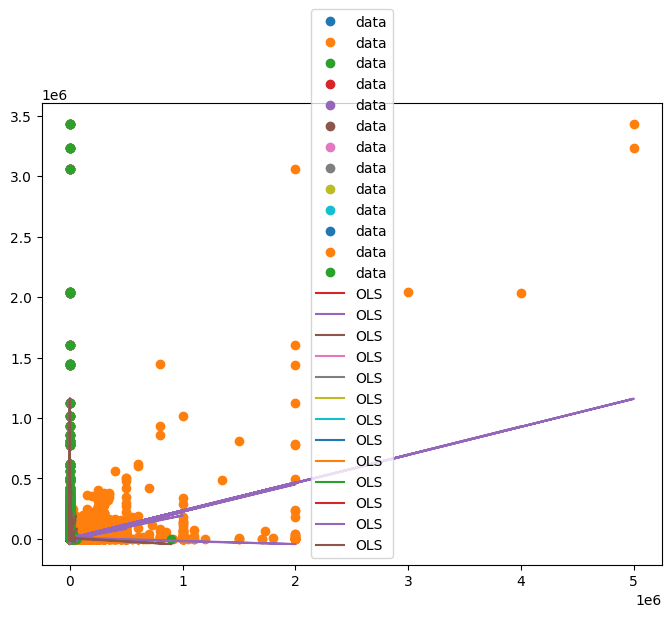

In [91]:
y_fitted = model1.fittedvalues
x = np.linspace(0, Total_Rows-1,Total_Rows)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X, Y, 'o', label='data')
ax.plot(X, y_fitted,label='OLS')
ax.legend(loc='best')

In [92]:
np.linspace(0, Total_Rows-1,Total_Rows)

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.5696e+04, 1.5697e+04,
       1.5698e+04])

<font face = "Time New Roman" size = 5 color = red> Randomly choose 50 points of prediction and actual data to compare</font>

<font face = "Time New Roman" size = 5 color = red> Circle is actual donation star is regression result</font>

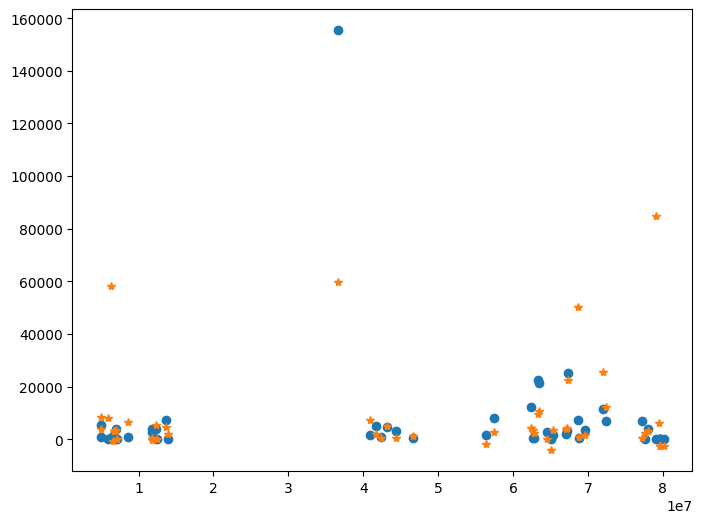

In [93]:
from random import sample
mysample = sample(range(0,Total_Rows), 50)
x = combined_data['Campaign_ID'][mysample]
y = extract_data['Actual_Donation_Amount'][mysample]
y_fitted = model1.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted[mysample],'*',label='OLS')

<font face = "Time New Roman" size = 5 color = red>Test normality.</font>

In [94]:
import openturns as ot
from statsmodels.stats.diagnostic import lilliefors
model_resid = model1.resid
result = lilliefors(list(model_resid))
print(result)

(0.3232208581048588, 0.0009999999999998899)


In [95]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(list(model_resid), dist='norm')
print('stat=%.3f' % (result.statistic))
print('significance_level:', (result.significance_level))

stat=3322.781
significance_level: [15.  10.   5.   2.5  1. ]


<AxesSubplot:ylabel='Density'>

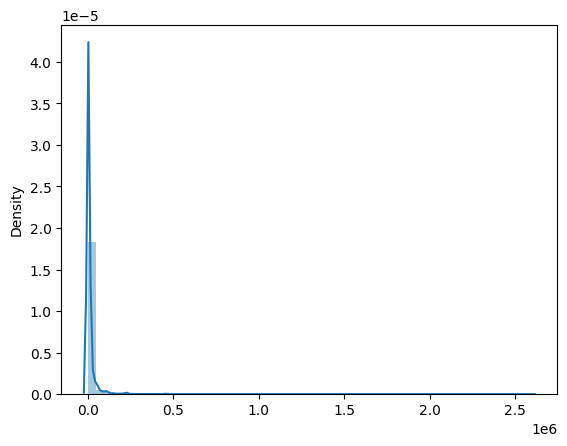

In [104]:
sns.distplot(np.abs(model1.resid))

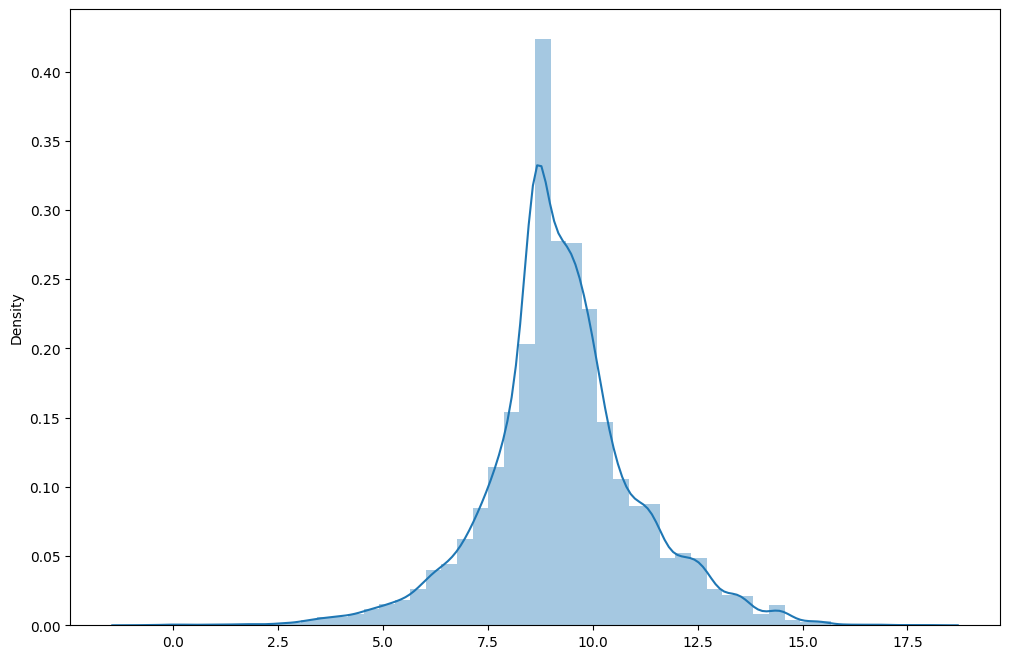

In [103]:
fig, ax = plt.subplots(figsize=[12,8])
converted_data1 = stats.boxcox(np.abs(model1.resid))[0] #对数据进行BOX-COX变换
sns.distplot(converted_data1)
plt.show()



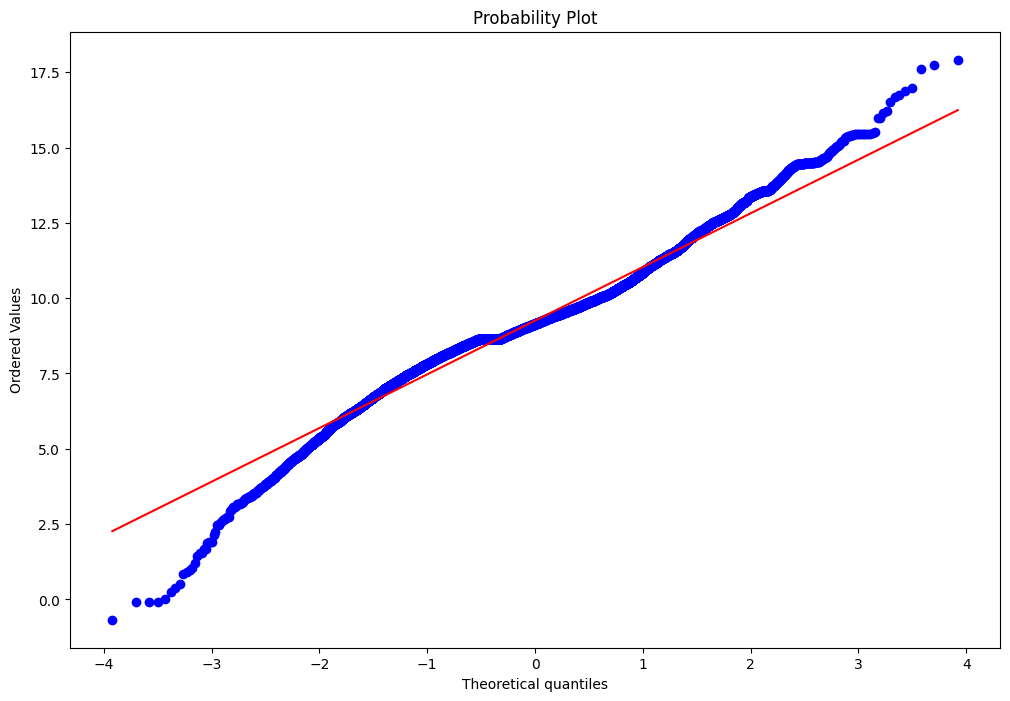

In [105]:
fig, ax = plt.subplots(figsize=[12,8])
prob = stats.probplot(converted_data1, dist=stats.norm, plot=ax) #生成Q-Q图
plt.show()


(array([1.8000e+01, 4.0000e+00, 6.0000e+00, 8.0000e+01, 1.6600e+02,
        2.5560e+03, 1.2673e+04, 1.2400e+02, 3.2000e+01, 1.5000e+01,
        7.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-463099.43172403, -386718.42627365, -310337.42082327,
        -233956.41537289, -157575.40992251,  -81194.40447213,
          -4813.39902175,   71567.60642863,  147948.61187901,
         224329.61732939,  300710.62277977,  377091.62823015,
         453472.63368053,  529853.63913091,  606234.64458129,
         682615.65003167,  758996.65548205,  835377.66093243,
         911758.66638281,  988139.67183319, 1064520.67728357,
        1140901.6827

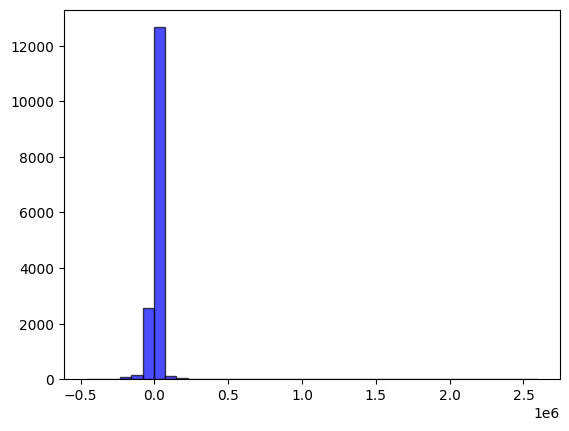

In [96]:
plt.hist(model1.resid, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)

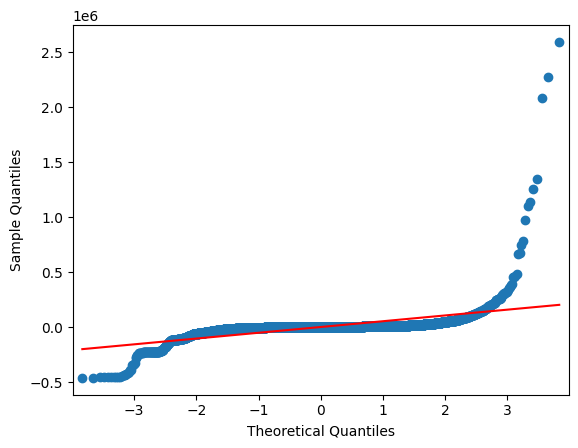

In [97]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

# 样例1

res = model1.resid # 获取了构造的模型的残差，获取了数据
# 主要调用方法
probplot = sm.ProbPlot(res) # 实例probplot
probplot.qqplot(line='s') # 调用函数

plt.show()

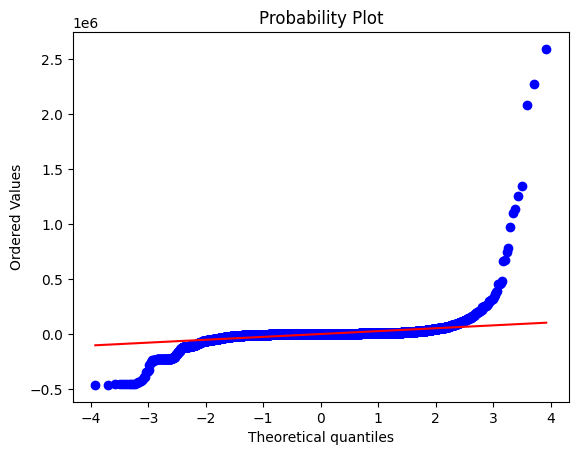

In [98]:
#stats.probplot(sample, dist=stats.norm, plot=plt)
res = stats.probplot(list(model_resid),  dist=stats.norm, plot=plt)

<font face = "Time New Roman" size = 5 color =red> Model 2</font>

In [99]:
model_resid2 = model2.resid
result = lilliefors(list(model_resid2))
print(result)

(0.3232208581048588, 0.0009999999999998899)


In [100]:
variables_data3

NameError: name 'variables_data3' is not defined

<font face = "Time New Roman" size = 5 color =red> Model 3</font>

In [ ]:
variables_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Actual_Donation_Amount  15979 non-null  float64
 1   Campaign_Goal           15979 non-null  int64  
 2   NPO_Tax_Deductibility   15979 non-null  int64  
 3   duration_day            15979 non-null  int64  
 4   Campaign_Image_num      15979 non-null  int64  
 5   Campaign_Video          15979 non-null  int64  
 6   Msg_category            15979 non-null  int64  
 7   Num_desc_cam            15979 non-null  int64  
 8   Num_desc_NPO            15979 non-null  int64  
 9   Org_causes              15979 non-null  int64  
 10  Cam_causes              15979 non-null  int64  
 11  Custom_Amount1          15979 non-null  int64  
 12  Custom_Amount2          15979 non-null  int64  
 13  Custom_Amount3          15979 non-null  int64  
 14  Custom_Amount4          15979 non-null

In [ ]:
model3 = smf.ols(formula = 'Actual_Donation_Amount ~ Campaign_Goal  + NPO_Tax_Deductibility + duration_day + \
    Campaign_Image_num  + Campaign_Video + Msg_category+\
    Num_desc_cam + Num_desc_NPO + Org_causes + Cam_causes', data = variables_data3).fit()

results3 = model3.summary()
print(results3)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.307
Model:                                OLS   Adj. R-squared:                  0.306
Method:                     Least Squares   F-statistic:                     706.9
Date:                    Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                            23:47:28   Log-Likelihood:            -1.9632e+05
No. Observations:                   15979   AIC:                         3.927e+05
Df Residuals:                       15968   BIC:                         3.927e+05
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

# Residuals

In [ ]:
model.resid

0        -6502.023006
1        -6383.130003
2       -10109.009621
3         3680.179976
4          -31.460896
             ...     
15974    -1809.426473
15975     -307.708669
15976     2575.192535
15977     1031.338847
15978    -4940.357032
Length: 15979, dtype: float64

Author: Guo Shiping
Created by 27/Jan/2023